# FODS Assignment 
## 1-A : Regression without regularization

In [2429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

In [2430]:
df = pd.read_csv('Data.csv')

In [2431]:
df.head(20)

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955
5,0.943944,5.333213
6,-0.945946,-2.572966
7,-0.537538,-0.114598
8,-0.387387,-0.566798
9,0.413413,2.219073


In [2432]:
df.describe()

,X,Y
count,1.000000e+03,1000.000000
mean,-3.830269e-18,0.954743
std,5.782171e-01,1.809135
min,-1.000000e+00,-5.091491
25%,-5.000000e-01,-0.106178
50%,5.009014e-17,0.912120
75%,5.000000e-01,1.967479
max,1.000000e+00,6.559203


## TASK 1 - Data Preprocessing
#### Normalization

In [2433]:
Xbar = df['X'].mean()
Xstd = df['X'].std()
for i in range(len(df)):
    df.loc[i,"X"] = (df.iloc[i]["X"]-Xbar)/Xstd

In [2434]:
shuffle_df = df.sample(frac=1).reset_index(drop=True)
train_size = int(0.8 * len(df))
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [2435]:
train_set

,X,Y
0,-1.435153,0.610148
1,-1.487088,-0.813890
2,-0.406829,-1.307632
3,-0.978120,0.655535
4,-0.901948,1.109525
...,...,...
795,-0.451839,-0.199343
796,1.379755,5.625558
797,0.832700,0.268848
798,1.639433,5.796470


In [2436]:
test_set

,X,Y
800,0.721904,2.555997
801,-0.908872,-1.650537
802,-0.611108,-0.067392
803,1.473239,5.812215
804,0.070979,0.777671
...,...,...
995,0.496850,0.098631
996,-0.666506,-0.575670
997,1.327819,2.597773
998,-1.272421,-1.267368


## Data Visualization
#### Plotting the training dataset.

In [2437]:
x = train_set.iloc[:,0]
y = train_set.iloc[:,1]

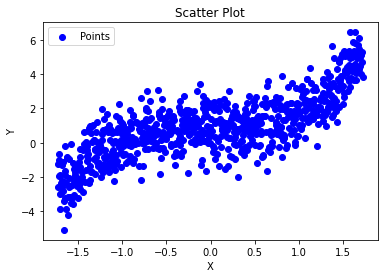

In [2438]:
plt.scatter(x, y, label='Points', color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.legend()

### Careful observation of the given figure above shows : 

1. The graph resembles the graph of **y = x^3**
2. This suggests that there exists a cubic relation between the dependent variable Y and independent variable X

## Task 2 : Polynomial Regression

In [2439]:
x_train = np.array(x.to_numpy(), dtype = float)
y_train = np.array(y.to_numpy(), dtype = float)
x_test = np.array(test_set.iloc[:,0].to_numpy(), dtype = float)
y_test = np.array(test_set.iloc[:,1].to_numpy(), dtype = float)

In [2440]:
def generate_features(X, degree):
    features = np.column_stack([X**i for i in range(degree + 1)])
    return features

In [2441]:
def MSE(y_true, y_pred):
    squared_errors = (y_true - y_pred) ** 2
    mse = np.mean(squared_errors)
    return mse

In [2442]:
def polynomial_regression(x_train, y_train, x_test, y_test, degree, iterations=500, l_rate = 0.01):
    train_error_list = []
    test_error_list = []
    
    weights = np.ones(degree+1)
    features_train = generate_features(x_train, degree)
    features_test = generate_features(x_test, degree)

    for i in range(iterations):
        y_train_pred = np.dot(features_train, weights)
        train_mse = MSE(y_train, y_train_pred)
        train_error_list.append(train_mse)
        
        y_test_pred = np.dot(features_test, weights)
        test_mse = MSE(y_test, y_test_pred)
        test_error_list.append(test_mse)
        
        error = y_train_pred - y_train
        gradients = np.dot(features_train.T, error)/len(y_train)
        weights = weights - l_rate*gradients
        
    return weights, train_error_list, test_error_list

The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 1 are: 
X0 = 0.9546765355709251
X1 = 1.3859150921267822
The training error obtained with polynomial of degree 1 is: 1.3787698347693769
The testing error obtained with polynomial of degree 1 is: 1.250298758887331


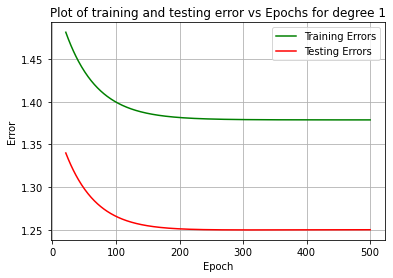



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 2 are: 
X0 = 0.7735629561663651
X1 = 1.3843526205645305
X2 = 0.16192099749456706
The training error obtained with polynomial of degree 2 is: 1.367689831273718
The testing error obtained with polynomial of degree 2 is: 1.2616631400561245


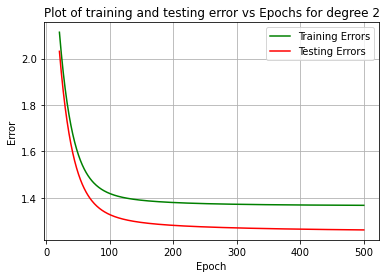



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 3 are: 
X0 = 0.7739650184936157
X1 = 0.3543641311266618
X2 = 0.15604488430740346
X3 = 0.5969300964781201
The training error obtained with polynomial of degree 3 is: 1.003098045186235
The testing error obtained with polynomial of degree 3 is: 0.9420649822147191


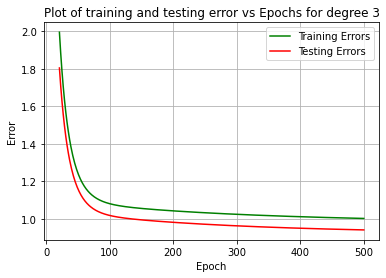



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 4 are: 
X0 = 0.7270403204118115
X1 = 0.35562578799078687
X2 = 0.3651728739675003
X3 = 0.5966240611681146
X4 = -0.08254255325159551
The training error obtained with polynomial of degree 4 is: 1.010649909544233
The testing error obtained with polynomial of degree 4 is: 0.9381266532154271


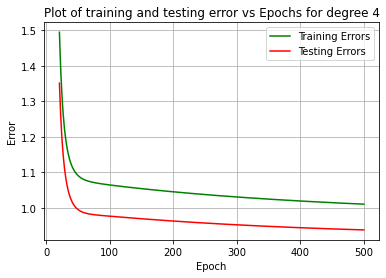



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 5 are: 
X0 = 0.7260129554700817
X1 = 0.35846905158782266
X2 = 0.3630283928190786
X3 = 0.3503939385853993
X4 = -0.08153126765689343
X5 = 0.10755633374506245
The training error obtained with polynomial of degree 5 is: 0.9932871715063325
The testing error obtained with polynomial of degree 5 is: 0.9333674126132698


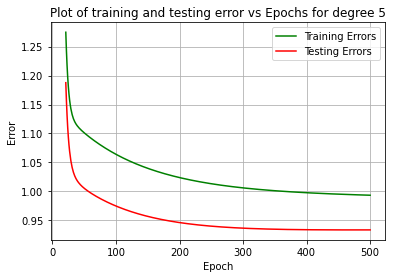



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 6 are: 
X0 = 0.6927824374303828
X1 = 0.35923895314570947
X2 = 0.2661071485819632
X3 = 0.3524488536519513
X4 = 0.02454687191790374
X5 = 0.10644947867410141
X6 = -0.021942274322512972
The training error obtained with polynomial of degree 6 is: 0.9953497599587396
The testing error obtained with polynomial of degree 6 is: 0.9419307980455683


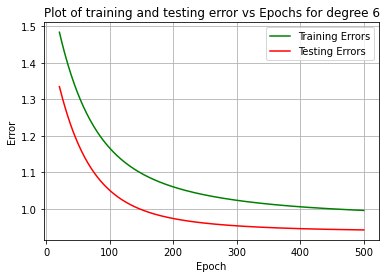



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 7 are: 
X0 = 0.6921252797474017
X1 = 0.3299866425102023
X2 = 0.26591165527213684
X3 = 0.30916488035280865
X4 = 0.02466956568292743
X5 = 0.1587138386794249
X6 = -0.021948290548665244
X7 = -0.01171171886001146
The training error obtained with polynomial of degree 7 is: 0.9925373383873187
The testing error obtained with polynomial of degree 7 is: 0.9405064091920073


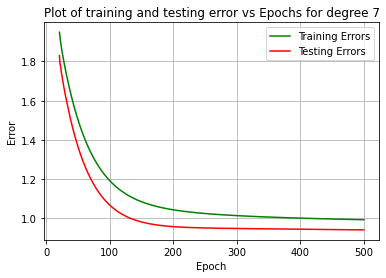



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 8 are: 
X0 = 2.0522977534669365e+283
X1 = 5.21609943184956e+281
X2 = 5.00579624359764e+283
X3 = 1.138237805924196e+282
X4 = 1.2680054860394975e+284
X5 = 2.2278474625887816e+282
X6 = 3.293686437483717e+284
X7 = 3.587220230685359e+282
X8 = 8.713363332425446e+284
The training error obtained with polynomial of degree 8 is: inf
The testing error obtained with polynomial of degree 8 is: inf


C:\Users\dhane\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\dhane\AppData\Local\Temp\ipykernel_24272\1307598138.py:2: RuntimeWarning: overflow encountered in square
  squared_errors = (y_true - y_pred) ** 2


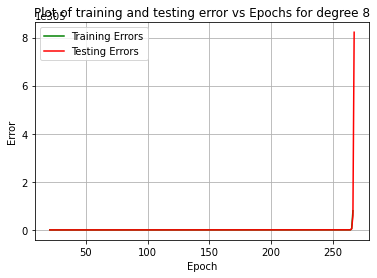



The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree 9 are: 
X0 = nan
X1 = nan
X2 = nan
X3 = nan
X4 = nan
X5 = nan
X6 = nan
X7 = nan
X8 = nan
X9 = nan
The training error obtained with polynomial of degree 9 is: nan
The testing error obtained with polynomial of degree 9 is: nan


C:\Users\dhane\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\dhane\AppData\Local\Temp\ipykernel_24272\1307598138.py:2: RuntimeWarning: overflow encountered in square
  squared_errors = (y_true - y_pred) ** 2
C:\Users\dhane\AppData\Local\Temp\ipykernel_24272\992492317.py:16: RuntimeWarning: invalid value encountered in subtract
  weights = weights - l_rate*gradients


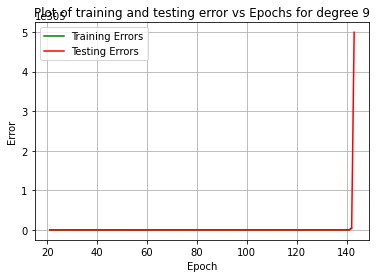

In [2443]:
train_errors_gradient_descent = []
test_errors_gradient_descent = []
models_gradient_descent = []
iterations = 500
epochs = np.arange(21, iterations+1)
for i in range (1, 10):
    theta, train_errors, test_errors = polynomial_regression(x_train, y_train, x_test, y_test, i, iterations)
    models_gradient_descent.append(theta)
    print("The optimal weights obtained after performing polynomial regression using gradient descent with a polynomial of degree " + str(i) + " are: ")
    for j in range (theta.size):
        print("X" + str(j) + " = " + str(theta[j]))
    train_errors_gradient_descent.append(train_errors[-1])
    test_errors_gradient_descent.append(test_errors[-1])
    print("The training error obtained with polynomial of degree " + str(i) + " is: " + str(train_errors[-1]))
    print("The testing error obtained with polynomial of degree " + str(i) + " is: " + str(test_errors[-1]))
    plt.plot(epochs, train_errors[20:], color = "green",label='Training Errors')
    plt.plot(epochs, test_errors[20:], color = "red", label='Testing Errors')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Plot of training and testing error vs Epochs for degree '+ str(i))
    plt.legend()
    plt.grid(True)
    plt.show()
    print("\n")

#### After careful observation : 

1. For polynomials of degree 8 and degree 9, the weights increase substantially
2. They are not regularized and hence the model tends to overfit 
3. This is why we can observe the weights approaching infinity or having NaN values.

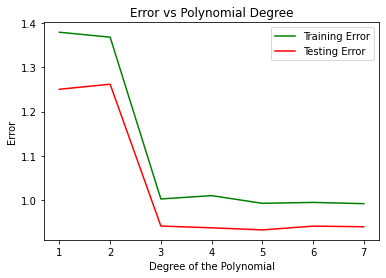

In [2444]:
degree = [1, 2, 3, 4, 5, 6, 7]
plt.plot(degree, train_errors_gradient_descent[0:7], color='g', label='Training Error')
plt.plot(degree, test_errors_gradient_descent[0:7], color='r', label='Testing Error')
plt.xlabel('Degree of the Polynomial') 
plt.ylabel('Error') 
plt.title('Error vs Polynomial Degree')  
plt.legend()
plt.show() 

#### We observe the following : 
1. A significant drop in the values of training error and testing error at degree 3
2. As we increase the degree further, we don't notice a significant drop in the training and testing errors.
3. OVerfitting for polynomials with degree 8 and degree 9.

#### We can hence conclude that the most optimal model that would fit the given dataset is a polynomial of **degree 3**.

In [2445]:
def predictY(PlotX, theta, degree):
    features = generate_features(PlotX, degree)
    return np.dot(features, theta)

In [2446]:
count = 200
shuffled_df = df.sample(frac = 1, random_state = np.random.seed())
Points = shuffled_df[:count]
subX = Points['X'].to_numpy()
subY = Points['Y'].to_numpy()

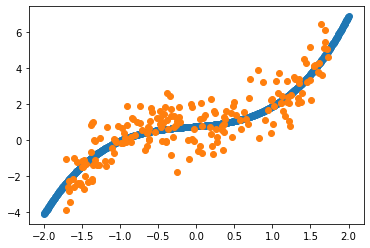

In [2447]:
optimal_params = models_gradient_descent[2]
PlotX = np.linspace(math.floor(df['X'].min()), math.ceil(df['X'].max()), 1000)
PlotY = predictY(PlotX, optimal_params, 3)
plt.scatter(PlotX,PlotY)
plt.scatter(subX, subY)
plt.show()

#### We can clearly see that the model perfectly fits the points in the dataset